In [3]:
import pandas as pd

# Load the pickle file back into a DataFrame
data = pd.read_pickle('data/simulated_data.pkl')



# Check the loaded data
print(data.head())

unique_id_count = data['id'].nunique()
print(f"Number of unique IDs: {unique_id_count}")

print(data.shape)

   id  visit  obstime  predtime  time  event         Y1        Y2        Y3  \
0   0      0        0         0     9   True  11.943728 -3.032593  2.760192   
1   0      1        1         1     9   True  12.255357 -5.431790  4.225383   
2   0      2        2         2     9   True  12.491947 -6.953460  2.854653   
3   0      3        3         3     9   True  16.406431 -8.508030  4.766191   
4   0      4        4         4     9   True  16.632347 -9.813989  5.816555   

    X1        X2    pred_Y1   pred_Y2   pred_Y3      true  
0  1.0  0.680195  11.943728 -3.032593  2.760192  1.000000  
1  1.0  0.680195  12.255357 -5.431790  4.225383  0.999397  
2  1.0  0.680195  12.491947 -6.953460  2.854653  0.998135  
3  1.0  0.680195  16.406431 -8.508030  4.766191  0.995494  
4  1.0  0.680195  16.632347 -9.813989  5.816555  0.989983  
Number of unique IDs: 1000


Input tensor shape: torch.Size([1, 1000, 3])
Output tensor shape: torch.Size([1, 1000, 9])


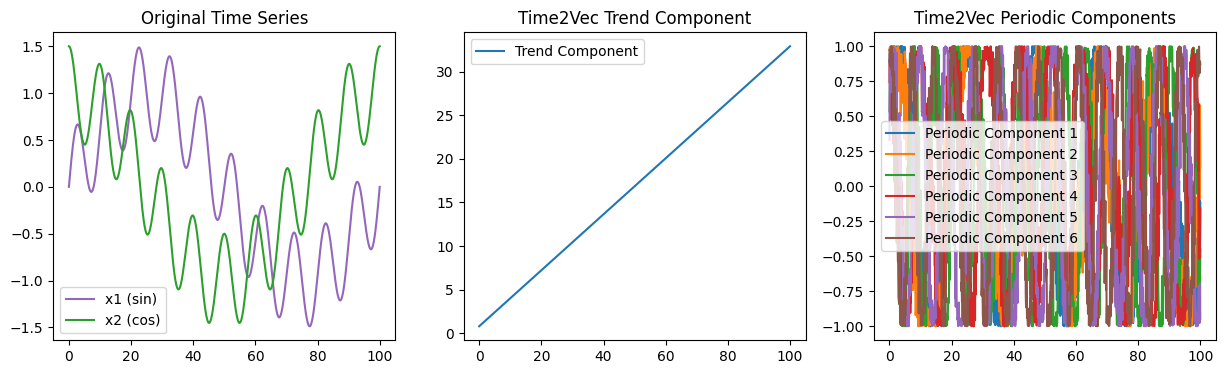

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from time2vec.torch import Time2Vec

def create_time_series_tensor():
    """
    Create a time series tensor with sine and cosine components and a time trend.
    """
    t = np.linspace(0, 100, 1000).reshape(-1, 1)
    x1 = np.sin(10.0 * 2.0 * np.pi * t) + 0.5 * np.sin(100 * 2.0 * np.pi * t)
    x2 = np.cos(10.0 * 2.0 * np.pi * t) + 0.5 * np.cos(100 * 2.0 * np.pi * t)

    x = np.concatenate([x1, x2, t], axis=1)[None, ...]  # Add batch dimension
    return x

def plot_time2vec(x, x_out, framework="torch"):
    """
    Plot the original time series and the Time2Vec output.
    """
    if framework == "torch":
        x = x.detach().numpy()
        x_out = x_out.detach().numpy()

    t, x1, x2 = x[0, :, 2], x[0, :, 0], x[0, :, 1]

    fig, axs = plt.subplots(1, 3, figsize=(15, 4))
    axs[0].plot(t, x1, 'tab:purple', label='x1 (sin)')
    axs[0].plot(t, x2, 'tab:green', label='x2 (cos)')
    axs[0].set_title('Original Time Series')
    axs[0].legend()

    axs[1].plot(t, x_out[0, :, 2], 'tab:blue', label='Trend Component')
    axs[1].set_title('Time2Vec Trend Component')
    axs[1].legend()

    for i in range(x_out.shape[2] - 3):
        axs[2].plot(t, x_out[0, :, 3 + i], label=f'Periodic Component {i+1}')
    axs[2].set_title('Time2Vec Periodic Components')
    axs[2].legend()

    plt.show()
import torch
import numpy as np
from time2vec.torch import Time2Vec

x = create_time_series_tensor()
x = torch.tensor(x, dtype=torch.float32)

# TimeSeries in (x); TimeSeries out (x_out)
print('Input tensor shape:', x.shape)
x_out = Time2Vec(num_frequency=6, num_vars=2)(x)
print('Output tensor shape:', x_out.shape)

x = np.squeeze(x, axis=0)
x_out = np.squeeze(x_out, axis=0)

In [1]:
import pandas as pd

In [5]:
import pandas as pd
import torch

from wheel import positional_encoding  # Import the positional_encoding function

# Load the pickle file back into a DataFrame
data = pd.read_pickle('data/simulated_data.pkl')

# Check the loaded data
print(data.head())

unique_id_count = data['id'].nunique()
print(f"Number of unique IDs: {unique_id_count}")

print(data.shape)

# Apply positional encoding
batch_size = data['id'].nunique()  # Number of unique IDs
length = data.groupby('id').size().max()  # Maximum number of visits per ID
d_model = 16  # Example dimension of the model vector

# Simulate observation times
obs_time = torch.tensor(data['time'].values).reshape(batch_size, -1).to('cuda')

# Apply positional encoding
pe = positional_encoding(batch_size, length, d_model, obs_time)

# Print the shape of the positional encoding
print(f"Shape of positional encoding: {pe.shape}")

   id  visit  obstime  predtime  time  event         Y1        Y2        Y3  \
0   0      0        0         0     9   True  11.943728 -3.032593  2.760192   
1   0      1        1         1     9   True  12.255357 -5.431790  4.225383   
2   0      2        2         2     9   True  12.491947 -6.953460  2.854653   
3   0      3        3         3     9   True  16.406431 -8.508030  4.766191   
4   0      4        4         4     9   True  16.632347 -9.813989  5.816555   

    X1        X2    pred_Y1   pred_Y2   pred_Y3      true  
0  1.0  0.680195  11.943728 -3.032593  2.760192  1.000000  
1  1.0  0.680195  12.255357 -5.431790  4.225383  0.999397  
2  1.0  0.680195  12.491947 -6.953460  2.854653  0.998135  
3  1.0  0.680195  16.406431 -8.508030  4.766191  0.995494  
4  1.0  0.680195  16.632347 -9.813989  5.816555  0.989983  
Number of unique IDs: 1000
(7647, 15)


RuntimeError: shape '[1000, -1]' is invalid for input of size 7647

In [4]:
from Gate import Transformer1
def count_parameters_detailed(model):
    for name, param in model.named_parameters():
        if param.requires_grad:
            print(f"{name}: {param.numel():,} parameters")
    total = sum(p.numel() for p in model.parameters() if p.requires_grad)
    print(f"\nTotal trainable parameters: {total:,}")

# Example usage:
model = Transformer1(d_long=3, d_base=2, d_model=32, nhead=4,
                    num_decoder_layers=7)
count_parameters_detailed(model)

decoder.embedding.0.weight: 160 parameters
decoder.embedding.0.bias: 32 parameters
decoder.embedding.3.weight: 32 parameters
decoder.embedding.3.bias: 32 parameters
decoder.embedding.4.weight: 1,024 parameters
decoder.embedding.4.bias: 32 parameters
decoder.decoder_layers.0.Attention.q_linear.weight: 1,024 parameters
decoder.decoder_layers.0.Attention.v_linear.weight: 1,024 parameters
decoder.decoder_layers.0.Attention.k_linear.weight: 1,024 parameters
decoder.decoder_layers.0.Attention.out.weight: 1,024 parameters
decoder.decoder_layers.0.Attention.out.bias: 32 parameters
decoder.decoder_layers.0.feedForward.0.weight: 2,048 parameters
decoder.decoder_layers.0.feedForward.0.bias: 64 parameters
decoder.decoder_layers.0.feedForward.2.weight: 2,048 parameters
decoder.decoder_layers.0.feedForward.2.bias: 32 parameters
decoder.decoder_layers.0.layerNorm1.weight: 32 parameters
decoder.decoder_layers.0.layerNorm1.bias: 32 parameters
decoder.decoder_layers.0.layerNorm2.weight: 32 parameters
de

In [6]:
from data_simulation_JM import simulate_JM_base2

In [1]:
from data_simulation_JM import simulate_JM_base2
I = 1000
obstime = [0,1,2,3,4,5,6,7,8,9,10]
data = simulate_JM_base2(I=I, obstime=obstime, opt="none", seed=0)
#df = pd.DataFrame(obs_time.numpy())
data.to_csv("data/surv_data_long.csv", index=False) 

10


In [78]:
from util import (get_tensors, get_mask, init_weights, get_std_opt)
I = data['id'].nunique()

        ## split train/test
random_id = range(I) #np.random.permutation(range(I))
train_id = random_id[0:int(0.7*I)]
test_id = random_id[int(0.7*I):I]

train_data = data[data["id"].isin(train_id)]
test_data = data[data["id"].isin(test_id)]

print(train_data.shape)

batch_long, batch_base, batch_mask, batch_e, batch_t, obs_time = get_tensors(train_data)

(5329, 15)


In [109]:
def positional_encoding(batch_size, length, d_model, obs_time):
    """
    Positional Encoding for each visit
    
    Parameters
    ----------
    batch_size:
        Number of subjects in batch
    length:
        Number of visits
    d_model:
        Dimension of the model vector
    obs_time:
        Observed/recorded time of each visit
    """
    PE = torch.zeros((batch_size, length, d_model)).to('cuda')
    if obs_time.ndim == 0:
        obs_time = obs_time.repeat(batch_size).unsqueeze(1)
    elif obs_time.ndim == 1:
        obs_time = obs_time.repeat(batch_size,1)
    obs_time = obs_time.to('cuda')
    pow0 = torch.pow(10000, torch.arange(0, d_model, 2, dtype=torch.float32)/d_model).to('cuda')

    PE[:, :, 0::2] = torch.sin(torch.einsum('ij,k->ijk', obs_time, pow0))
    pow1 = torch.pow(10000, torch.arange(1, d_model, 2, dtype=torch.float32)/d_model).to('cuda')
    PE[:, :, 1::2] = torch.cos(torch.einsum('ij,k->ijk', obs_time, pow1))

    return PE


class Decoder_p(nn.Module):
    """
    Decoder Block
    
    Parameters_
    ----------
    d_model:
        Dimension of the input vector
    nhead:
        Number of heads
    num_decoder_layers:
        Number of decoder layers to stack
    dropout:
        The dropout value
    """
    def __init__(self,
                 d_model,
                 nhead,
                 num_decoder_layers,
                 dropout):
        super().__init__()

        self.decoder_layers = nn.ModuleList([Decoder_Layer(d_model,nhead,dropout)
                                             for _ in range(num_decoder_layers)])
        
    def forward(self, q, kv, mask, pred_time):
        # Positional Embedding
        
        q = q + positional_encoding(
            q.shape[0], q.shape[1], q.shape[2], pred_time)
        
        # Decoder Layers
        for layer in self.decoder_layers:
            x = layer(q, kv,mask)

        return x

In [168]:
import torch.nn.functional as F
class Decoder_Layer(nn.Module):
    """
    Decoder Block
    
    Parameters
    ----------
    d_model:
        Dimension of the input vector
    nhead:
        Number of heads
    dropout:
        The dropout value
    """
    
    def __init__(self,
                 d_model,
                 nhead,
                 dropout = 0.1):
        super().__init__()
        
        self.dropout = nn.Dropout(dropout)
        
        self.Attention = MultiHeadAttention(d_model, nhead)
                
        self.feedForward = nn.Sequential(
            nn.Linear(d_model,64),
            nn.ReLU(),
            nn.Linear(64,d_model),
            nn.Dropout(dropout)
            )
        
        self.layerNorm1 = nn.LayerNorm(d_model)
        self.layerNorm2 = nn.LayerNorm(d_model)
        
    def forward(self, q, kv, mask):
        
        # Attention
        residual = q
        x = self.Attention(query=q, key=kv, value=kv, mask = mask)
        x = self.dropout(x)
        x = self.layerNorm1(x + residual)
        
        # Feed Forward
        residual = x
        x = self.feedForward(x)
        x = self.layerNorm2(x + residual)
        
        return x
class MultiHeadAttention(nn.Module):
    def __init__(self, d_model, nhead, dropout = 0.1):
        super().__init__()
        
        self.d_model = d_model
        self.d_k = d_model // nhead
        self.nhead = nhead
        
        assert (
            d_model % nhead == 0
        ), "Embedding size (d_model) needs to be divisible by number of heads"
        
        self.q_linear = nn.Linear(d_model, d_model, bias=False)
        self.v_linear = nn.Linear(d_model, d_model, bias=False)
        self.k_linear = nn.Linear(d_model, d_model, bias=False)
        
        self.dropout = nn.Dropout(dropout)
        self.out = nn.Linear(d_model, d_model)
        
    def attention(self, query, key, value, d_k, mask = None, dropout=None):
    
        scores = torch.matmul(query, key.transpose(-2, -1)) /  np.sqrt(d_k)
        if mask is not None:
            mask = mask.unsqueeze(1).to('cuda')
            scores = scores.masked_fill(mask == 0, -float('inf'))
        scores = F.softmax(scores, dim=-1)
        
        if dropout is not None:
            scores = dropout(scores)
            
        output = torch.matmul(scores, value)
        return output

    def forward(self, query, key, value, mask = None):
        I = query.shape[0]
        
        # perform linear operation and split into N heads
        query = self.q_linear(query).view(I, -1, self.nhead, self.d_k)
        key = self.k_linear(key).view(I, -1, self.nhead, self.d_k)
        value = self.v_linear(value).view(I, -1, self.nhead, self.d_k)
        
        # transpose to get dimensions I * nhead * J * d_k
        query = query.transpose(1,2)
        key = key.transpose(1,2)
        value = value.transpose(1,2)

        # calculate attention
        scores = self.attention(query, key, value, self.d_k, mask, self.dropout)
        # concatenate heads and put through final linear layer
        concat = scores.transpose(1,2).contiguous()\
        .view(I, -1, self.d_model)
        output = self.out(concat)
    
        return output


In [178]:

class Decoder_MMOE_Layer(nn.Module):
    """Transformer Decoder with Task-Specific Expert Selection"""
    def __init__(self, d_model, nhead, num_experts, d_ff_expert, d_long):
        super().__init__()
        self.dropout_attn = nn.Dropout(0.1)
        self.Attention = MultiHeadAttention(d_model, nhead)
        self.norm1 = nn.LayerNorm(d_model)

        self.experts = nn.ModuleList([
            nn.Sequential(
                nn.Linear(d_model, d_ff_expert),
                nn.ReLU(),
                nn.Linear(d_ff_expert, d_model)
            ) for _ in range(num_experts)
        ])

        # Task-specific routers
        self.gate_long = nn.Linear(d_model, num_experts)
        self.gate_surv = nn.Linear(d_model, num_experts)

        # Output heads
        self.longitudinal_head = nn.Linear(d_model, d_long)
        self.survival_head = nn.Linear(d_model, 1)

    def _task_gating(self, logits, k=2, select_idx=0):
        """Differentiable expert selection with softmax weighting"""
        # Get top-k values and indices
        topk_val, topk_idx = torch.topk(logits, k=k, dim=-1)  # [B, T, k]
        
        # Calculate softmax weights over top-k values
        softmax_weights = F.softmax(topk_val, dim=-1)  # [B, T, k]
        
        # Create weight matrix with selected expert weights
        weights = torch.zeros_like(logits)
        weights.scatter_(
            dim=-1,
            index=topk_idx[..., select_idx:select_idx+1],  # [B, T, 1]
            src=softmax_weights[..., select_idx:select_idx+1]
        )
        return weights

    def forward(self, q, kv, mask=None):
        # Self-attention block
        attn_output = self.Attention(query=q, key=kv, value=kv, mask=mask)
        x = self.norm1(q + self.dropout_attn(attn_output))

        # Compute expert outputs
        expert_outputs = torch.stack([expert(x) for expert in self.experts], dim=2)  # [B, T, E, D]

        # Task-specific routing
        gate_long = self._task_gating(self.gate_long(x), k=2, select_idx=0)  # Top-1 expert
        gate_surv = self._task_gating(self.gate_surv(x), k=2, select_idx=1)  # Second expert

        # Combine experts
        combined_long = torch.einsum('bte,btec->btc', gate_long, expert_outputs)
        combined_surv = torch.einsum('bte,btec->btc', gate_surv, expert_outputs)

        # Final outputs
        long_out = self.longitudinal_head(combined_long)
        surv_logit = self.survival_head(combined_surv)
        surv_out = torch.sigmoid(surv_logit)
        
        return long_out, surv_out

In [176]:
import torch.nn as nn
import torch
class Decoder(nn.Module):
    """
    Decoder Block
    
    Parameters
    ----------
    d_long:
        Number of longitudinal outcomes
    d_base:
        Number of baseline / time-independent covariates
    d_model:
        Dimension of the input vector
    nhead:
        Number of heads
    num_decoder_layers:
        Number of decoder layers to stack
    dropout:
        The dropout value
    """
    def __init__(self,
                 d_long,
                 d_base,
                 d_model,
                 nhead,
                 num_decoder_layers = 1,
                 dropout=0.1):
        super().__init__()
        
        self.embedding = nn.Sequential(
            nn.Linear(d_long + d_base, d_model),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.LayerNorm(d_model),
            nn.Linear(d_model, d_model)
            )
        
        self.decoder_layers = nn.ModuleList([Decoder_Layer(d_model,nhead,dropout)
                                             for _ in range(num_decoder_layers)])
        
    def forward(self, long, base, mask, obs_time):
        # ConcatenateMMoEHeaddding
        x = torch.cat((long, base), dim=2)
        x = self.embedding(x)
        
        # Positional Embedding

        x = x + positional_encoding(
            x.shape[0], x.shape[1], x.shape[2], obs_time)

        # Decoder Layers
        for layer in self.decoder_layers:
            decoding = layer(x, x, mask)

        return decoding

class Transformer1(nn.Module):
    """
    An adaptation of the transformer model (Attention is All you Need)
    fofrom util import (get_tensors, get_mask, init_weights, get_std_opt)r survival analysis.
    
    Parameters
    ----------
    d_long:
        Number of longitudinal outcomes
    d_base:
        Number of baseline / time-independent covariates
    d_model:
        Dimension of the input vector (post embedding)
    nhead:
        Number of heads
    num_decoder_layers:
        Number of decoder layers to stack
    dropout:
        The dropout value
    """
    def __init__(self,
                 d_long,
                 d_base,
                 d_model = 32,
                 nhead = 4,
                 n_expert = 4,
                 d_ff = 64,  
                 num_decoder_layers = 3,
                 dropout = 0.2):
        super().__init__()
        self.decoder = Decoder(d_long, d_base, d_model, nhead, num_decoder_layers, dropout)

        self.mmoe_layer = Decoder_MMOE_Layer(d_model, nhead, n_expert, d_ff, d_long)

    def forward(self, long, base, mask, obs_time, pred_time):        
        # Decoder Layers
        x = self.decoder(long, base, mask, obs_time)
        
        # Decoder Layer with prediction time embedding
        x = x+positional_encoding(
            x.shape[0], x.shape[1], x.shape[2], pred_time)
        long,surv = self.mmoe_layer(x,x, mask)

        return long, surv


In [179]:

from util import (get_tensors, get_mask, init_weights, get_std_opt)
model = Transformer1(d_long=3, d_base=2, d_model=32, nhead=4,
                    num_decoder_layers=4)
model.to('cuda')
model.apply(init_weights)
model = model.train()
optimizer = torch.optim.Adam(model.parameters(), lr=0, betas=(0.9, 0.98), eps=1e-9)
scheduler = get_std_opt(optimizer, d_model=32, warmup_steps=200, factor=0.2)

n_epoch = 25
batch_size = 32
    
    
loss_values = []

for epoch in range(n_epoch):
    running_loss = 0
    train_id = np.random.permutation(train_id)
    for batch in range(0, len(train_id), batch_size):
        optimizer.zero_grad()
            
        indices = train_id[batch:batch+batch_size]
        batch_data = train_data[train_data["id"].isin(indices)]
            
        batch_long, batch_base, batch_mask, batch_e, batch_t, obs_time = get_tensors(batch_data.copy())
        batch_long_inp = batch_long[:,:-1,:].to('cuda');batch_long_out = batch_long[:,1:,:].to('cuda')  #time 1-11 as train and 12 as validation 
        batch_base = batch_base[:,:-1,:].to('cuda')
        batch_mask_inp = get_mask(batch_mask[:,:-1]).to('cuda')
        batch_mask_out = batch_mask[:,1:].unsqueeze(2).to('cuda') 
        obs_time = obs_time.to('cuda')
        yhat_long, yhat_surv = model(batch_long_inp, batch_base, batch_mask_inp,
                        obs_time[:,:-1].to('cuda'), obs_time[:,1:].to('cuda'))
        
        loss1 = long_loss(yhat_long, batch_long_out, batch_mask_out)
        loss2 = surv_loss(yhat_surv, batch_mask, batch_e)
        
        loss = loss1 + loss2
        
        loss.backward()
        scheduler.step()
        running_loss += loss
    loss_values.append(running_loss.tolist())
plt.plot((loss_values-np.min(loss_values))/(np.max(loss_values)-np.min(loss_values)), 'b-')

NameError: name 'plt' is not defined

complete


In [152]:
from Gate import Transformer1

In [155]:
from util import (get_tensors, get_mask, init_weights, get_std_opt)
model = Transformer1(d_long=3, d_base=2, d_model=32, nhead=4,
                    num_decoder_layers=4)
model.to('cuda')
model.apply(init_weights)
model = model.train()
optimizer = torch.optim.Adam(model.parameters(), lr=0, betas=(0.9, 0.98), eps=1e-9)
scheduler = get_std_opt(optimizer, d_model=32, warmup_steps=200, factor=0.2)

n_epoch = 50
batch_size = 64
    
    
loss_values = []

for epoch in range(n_epoch):
    running_loss = 0
    train_id = np.random.permutation(train_id)
    for batch in range(0, len(train_id), batch_size):
        optimizer.zero_grad()
            
        indices = train_id[batch:batch+batch_size]
        batch_data = train_data[train_data["id"].isin(indices)]
            
        batch_long, batch_base, batch_mask, batch_e, batch_t, obs_time = get_tensors(batch_data.copy())
        batch_long_inp = batch_long[:,:-1,:].to('cuda');batch_long_out = batch_long[:,1:,:].to('cuda')  #time 1-11 as train and 12 as validation 
        batch_base = batch_base[:,:-1,:].to('cuda')
        batch_mask_inp = get_mask(batch_mask[:,:-1]).to('cuda')
        batch_mask_out = batch_mask[:,1:].unsqueeze(2).to('cuda') 
        obs_time = obs_time.to('cuda')
        yhat_long, yhat_surv = model(batch_long_inp, batch_base, batch_mask_inp,
                        obs_time[:,:-1].to('cuda'), obs_time[:,1:].to('cuda'),use_moe = False)
        
        loss1 = long_loss(yhat_long, batch_long_out, batch_mask_out)
        loss2 = surv_loss(yhat_surv, batch_mask, batch_e)
        
        loss = loss1 + loss2
        
        loss.backward()
        scheduler.step()
        running_loss += loss
    loss_values.append(running_loss.tolist())
plt.plot((loss_values-np.min(loss_values))/(np.max(loss_values)-np.min(loss_values)), 'b-')

NameError: name 'plt' is not defined

In [156]:
loss_values

[1227.9036712943239,
 1081.036820630734,
 849.4745719671103,
 651.3093409186251,
 529.6113087922205,
 449.4477444265342,
 394.9660752161263,
 350.17166014160335,
 310.9212975219318,
 274.2383190993341,
 239.04214953494852,
 205.51665451285834,
 175.92091648960937,
 149.98713764483554,
 125.2336170595159,
 103.06979246765974,
 86.2684417305632,
 72.10232630056818,
 61.44794099922382,
 53.65549494145909,
 47.78500461797283,
 44.10368175728349,
 41.38883288751451,
 38.35520578298846,
 36.63679381962372,
 34.62101195149265,
 34.130881570306556,
 33.57303732543674,
 31.900528736398293,
 30.459250033361318,
 29.974676880897746,
 30.270780113805866,
 30.815262652287675,
 29.4741770416686,
 28.766773650532777,
 28.02349843183503,
 28.211932149161804,
 26.89598918339025,
 26.52281245689925,
 26.104369498561756,
 26.375766386967275,
 26.69391133519107,
 25.810975540350576,
 25.81529852507116,
 25.166144496803163,
 24.97105022525799,
 24.900731504550322,
 25.10450388237312,
 24.371948463765587,
 

In [124]:
batch_long, batch_base, batch_mask, batch_e, batch_t, obs_time = get_tensors(train_data.copy())
batch_long_inp = batch_long[:,:-1,:].to('cuda');batch_long_out = batch_long[:,1:,:].to('cuda')  #time 1-11 as train and 12 as validation 
batch_base = batch_base[:,:-1,:].to('cuda')
batch_mask_inp = get_mask(batch_mask[:,:-1]).to('cuda')
batch_mask_out = batch_mask[:,1:].unsqueeze(2).to('cuda') 
obs_time = obs_time.to('cuda')
yhat_long, yhat_surv = model(batch_long_inp, batch_base, batch_mask_inp,
                obs_time[:,:-1].to('cuda'), obs_time[:,1:].to('cuda'))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (7000x10 and 32x32)

In [116]:
test3 = Decoder_p(d_model = 32, nhead = 4,
                 num_decoder_layers = 1,dropout= 0.1)
test3.train()
test3.to('cuda')
d = test3(a,a,get_mask(batch_mask[:,:-1].to('cuda')),obs_time[:,1:].to('cuda'))

In [128]:
b,c = test2(a,get_mask(batch_mask[:,:-1].to('cuda')),obs_time[:,1:].to('cuda'))

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument mat2 in method wrapper_CUDA_mm)

In [ ]:
import warnings 
warnings.filterwarnings("ignore")
n_epoch = 50
batch_size = 32
    
    
loss_values = []
loss1_list = []
loss2_list = []
for epoch in range(n_epoch):
    running_loss = 0
    train_id = np.random.permutation(train_id)
    for batch in range(0, len(train_id), batch_size):
        optimizer.zero_grad()
            
        indices = train_id[batch:batch+batch_size]
        batch_data = train_data[train_data["id"].isin(indices)]
            
        batch_long, batch_base, batch_mask, batch_e, batch_t, obs_time = get_tensors(batch_data.copy())
        batch_long_inp = batch_long[:,:-1,:].to('cuda')
        batch_long_out = batch_long[:,1:,:].to('cuda')
        batch_base = batch_base[:,:-1,:].to('cuda')
        batch_mask_inp = get_mask(batch_mask[:,:-1]).to('cuda')
        batch_mask_out = batch_mask[:,1:].unsqueeze(2).to('cuda') 
        obs_time = obs_time.to('cuda')
        yhat_long, yhat_surv = model(batch_long_inp, batch_base, batch_mask_inp,
                        obs_time[:,:-1].to('cuda'), obs_time[:,1:].to('cuda'))
        
        loss1 = long_loss(yhat_long, batch_long_out, batch_mask_out)
        loss2 = surv_loss(yhat_surv, batch_mask, batch_e)
        
        #loss = loss1 + loss2
        loss = multi_task_loss(loss1, loss2)
        
        loss.backward()
        scheduler.step()
        running_loss += loss
        loss1_list.append(loss1.tolist())
        loss2_list.append(loss2.tolist())
    loss_values.append(running_loss.tolist())
plt.plot((loss_values-np.min(loss_values))/(np.max(loss_values)-np.min(loss_values)), 'b-')


In [ ]:
def data_preprocessing(source):
    if source == 'JM':
        ##Load Data
        data = pd.read_pickle('data/simulated_data.pkl')
        I = data['id'].nunique()

        ## split train/test
        random_id = range(I) #np.random.permutation(range(I))
        train_id = random_id[0:int(0.7*I)]
        test_id = random_id[int(0.7*I):I]

        train_data = data[data["id"].isin(train_id)]
        test_data = data[data["id"].isin(test_id)]
    return train_id, train_data, test_id, test_data


def main(d_long = 3, d_base = 2, d_model = 32, nhead = 4, num_decoder_layers = 7,n_epoch = 50, batch_size = 32):
    train_id, train_data, test_id, test_data = data_preprocessing('JM')

    model = Transformer1(d_long=d_long, d_base=d_base, d_model=d_model, nhead=nhead,
                    num_decoder_layers=num_decoder_layers)
    model.to('cuda')
    model.apply(init_weights)
    model = model.train()
    optimizer = torch.optim.Adam(model.parameters(), lr=0, betas=(0.9, 0.98), eps=1e-9)
    scheduler = get_std_opt(optimizer, d_model=d_model, warmup_steps=200, factor=0.2)

    n_epoch = n_epoch 
    batch_size = batch_size 